<a href="https://colab.research.google.com/github/FlorTav/Ventas-de-Videojuegos---Data-Science/blob/main/TavernaFlorencia___TP_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción
El dataset original para este trabajo contiene datos sobre ventas de videojuegos lanzados entre 1971 y 2020 en distintas partes del mundo. Incluye información tal como la consola para la cual se lanzó, el género de juego, el año de lanzamiento, el puntaje en Metacritic, etc.

El objetivo de estre trabajo es entrenar un modelo de aprendizaje supervisado que permita predecir que tan exitoso (en términos de ventas) serán futuros lanzamientos.

Adicionalmente busco responder a las siguientes preguntas mediante la exploración inicial del dataset:
* ¿Hay géneros que sean populares en ciertas regiones pero no en otras?
* ¿Hay un género en particular que se haya vuelto más popular con el paso de los años?
* ¿Hay un género en particular cuya popularidad haya decaído con los años?
* ¿Qué año tuvo la mayor cantidad de lanzamientos?
* ¿Cuál es la consola más popular globalmente y por región?

#Importación de librerías


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor

#Carga del dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/vgchartz-2024.csv')
dataset.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


# Diccionario de datos
| Variable         | Tipo      | Descripción |
|-----------------|----------|-------------|
| `img`     | object      | Imagen con la portada del videojuego |
| `title`    | object      | Título de videojuego |
| `console`       | object   | Consola para la que se lanzó el videojuego |
| `genre`   | object      | Género del videojuego |
| `publisher`     | object   | Editor del videojuego |
| `developer`        | object   | Desarrollador del videojuego |
| `critic_score`           | float      | Puntaje en Metacritic (de 1 a 10) |
| `total_sales`        | float      | Cantidad de copias vendidas globalmente (expresada en millones) |
| `na_sales`       | float    | Cantidad de copias vendidas en Norteamerica (expresada en millones) |
| `jp_sales` | float      | Cantidad de copias vendidas en Japón (expresada en millones) |
| `pal_sales`     | float      | Cantidad de copias vendidas en Europa, Oceanía, algunos países de África, Asia y América del Sur (expresada en millones) |
| `other_sales`| float      | Cantidad de copias vendidas en países no incluidos en las anteriores regiones (expresada en millones) |
| `release_date` | object  | Fecha de salida del videojuego |
| `last_update`        |  object     | Fecha en la que se actualizó el dato por última vez |

#Limpieza de datos

##Eliminar columnas irrelevantes para el análisis
En este paso se eliminan las columnas "img", "critic_score" y "last_update" ya que son innecesarias para el analisis a realizar.

In [ ]:
dataset = dataset.drop(['img','critic_score', 'last_update'], axis=1)
dataset.head()

,title,console,genre,publisher,developer,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,16.15,8.41,0.47,5.49,1.78,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,15.86,9.06,0.06,5.33,1.42,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,15.09,6.18,0.41,6.05,2.44,2015-11-06


##Recuento de datos faltantes
Se cuentan los elementos faltantes de cada columna del dataset.

In [ ]:
dataset.isnull().sum()

,0
title,0
console,0
genre,0
publisher,0
developer,17
total_sales,45094
na_sales,51379
jp_sales,57290
pal_sales,51192
other_sales,48888


##Porcentaje de datos faltantes
Se calcula el porcentaje de elementos faltantes respecto del total de las filas para decidir qué hacer con ellos.

In [ ]:
porcentaje_faltante = dataset.isnull().mean()

datos_faltantes = pd.DataFrame({'Columna': dataset.columns,
                                 'Porcentaje faltante': porcentaje_faltante * 100})

datos_faltantes.sort_values(by=['Porcentaje faltante'], ascending=False).head()

,Columna,Porcentaje faltante
jp_sales,jp_sales,89.493252
na_sales,na_sales,80.259623
pal_sales,pal_sales,79.967508
other_sales,other_sales,76.368408
total_sales,total_sales,70.441765


##Manipulacion de los datos
El porcentaje de datos nulos es extremadamente alto, pero hay una razón. Esto puede ser debido a que algunos videojuegos son lanzados en ciertas regiones pero no en otras.

Por esta razón es que decidí completar los valores nulos con 0 en los registros donde haya al menos un valor distinto de 0 en las columnas de ventas por regiones.

En los casos donde todas las columnas de ventas por region tengan valor nulo, estas serán eliminadas ya que no serán útiles para el análisis.

###Eliminar filas con datos faltantes

En este paso eliminaré todas las filas donde cada una de las columnas de "x_sales" sean nulas.

In [ ]:
sales_cols = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']

rows_to_delete = dataset[dataset[sales_cols].isnull().all(axis=1)]

dataset = dataset.drop(rows_to_delete.index)

In [ ]:
porcentaje_faltante = dataset.isnull().mean()

datos_faltantes = pd.DataFrame({'Columna': dataset.columns,
                                 'Porcentaje faltante': porcentaje_faltante * 100})

datos_faltantes.sort_values(by=['Porcentaje faltante'], ascending=False).head()

,Columna,Porcentaje faltante
jp_sales,jp_sales,64.454075
na_sales,na_sales,33.215305
pal_sales,pal_sales,32.227037
other_sales,other_sales,20.050735
release_date,release_date,0.475637


In [ ]:
# Eliminar filas donde 'developer' es nulo
dataset = dataset.dropna(subset=['developer'])


###Reemplazo de valores nulos
Reemplazaré con 0 los campos de ventas por región nulos donde al menos una columna del registro sea mayor a 0.

In [ ]:
dataset[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']] = dataset[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].fillna(0)

In [ ]:
porcentaje_faltante = dataset.isnull().mean()

datos_faltantes = pd.DataFrame({'Columna': dataset.columns,
                                 'Porcentaje faltante': porcentaje_faltante * 100})

datos_faltantes.sort_values(by=['Porcentaje faltante'], ascending=False).head()

,Columna,Porcentaje faltante
release_date,release_date,0.470451
console,console,0.000000
title,title,0.000000
genre,genre,0.000000
publisher,publisher,0.000000


##Darle formato a la columna de fechas
El único dato que me interesa de la fecha de lanzamiento es el año, así que me quedaré solo con eso.


In [ ]:
dataset['release_date'] = pd.to_datetime(dataset['release_date'], errors='coerce').dt.year
dataset.head()

,title,console,genre,publisher,developer,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,20.32,6.37,0.99,9.85,3.12,2013.0
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,19.39,6.06,0.60,9.71,3.02,2014.0
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,16.15,8.41,0.47,5.49,1.78,2002.0
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,15.86,9.06,0.06,5.33,1.42,2013.0
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,15.09,6.18,0.41,6.05,2.44,2015.0


In [ ]:
#Transformo el tipo de dato a entero
dataset['release_date'] = pd.to_numeric(dataset['release_date'], errors='coerce').astype('Int64')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18918 entries, 0 to 18921
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         18918 non-null  object 
 1   console       18918 non-null  object 
 2   genre         18918 non-null  object 
 3   publisher     18918 non-null  object 
 4   developer     18918 non-null  object 
 5   total_sales   18918 non-null  float64
 6   na_sales      18918 non-null  float64
 7   jp_sales      18918 non-null  float64
 8   pal_sales     18918 non-null  float64
 9   other_sales   18918 non-null  float64
 10  release_date  18829 non-null  Int64  
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.8+ MB


Rellenar los valores faltantes en release_date con la media de la columna ya que eliminarlos nos dejaria con mucho datos faltantes.

In [ ]:
if dataset['release_date'].isnull().any():
    mean_release_year = int(dataset['release_date'].mean())
    dataset['release_date'].fillna(mean_release_year, inplace=True)
    # Convert to integer after filling with the mean.
    dataset['release_date'] = dataset['release_date'].astype(int)


<ipython-input-291-40f3536e2755>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['release_date'].fillna(mean_release_year, inplace=True)


##Verificar duplicados

In [ ]:
dataset.duplicated().sum()

np.int64(4)

In [ ]:
duplicate_rows = dataset[dataset.duplicated(keep=False)]
duplicate_rows


,title,console,genre,publisher,developer,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
2438,Zaidan Houjin Nippon Kanji Nouryoku Kentei Kyo...,DS,Misc,IE Institute,IE Institute,0.66,0.0,0.66,0.0,0.0,2006
2439,Zaidan Houjin Nippon Kanji Nouryoku Kentei Kyo...,DS,Misc,IE Institute,IE Institute,0.66,0.0,0.66,0.0,0.0,2006
11688,Itoi Shigesato no Bass Tsuri No. 1 Ketteihan!,N64,Sports,Nintendo,HAL Laboratory,0.07,0.0,0.07,0.0,0.0,2000
11689,Itoi Shigesato no Bass Tsuri No. 1 Ketteihan!,N64,Sports,Nintendo,HAL Laboratory,0.07,0.0,0.07,0.0,0.0,2000
15398,Sega Ages 2500 Series Vol. 32: Phantasy Star C...,PS2,Role-Playing,Sega,Sega,0.02,0.0,0.02,0.0,0.0,2008
15399,Sega Ages 2500 Series Vol. 32: Phantasy Star C...,PS2,Role-Playing,Sega,Sega,0.02,0.0,0.02,0.0,0.0,2008
18413,Battle of the Bands,Wii,Misc,THQ,Planet Moon Studios,0.00,0.0,0.00,0.0,0.0,2008
18436,Battle of the Bands,Wii,Misc,THQ,Planet Moon Studios,0.00,0.0,0.00,0.0,0.0,2008


###Eliminar filas duplicadas

In [ ]:
dataset.drop_duplicates(inplace=True)

##Intervalo de tiempo
Al analizar rapidamente los datos decidí recortar el intervalo de tiempo con el que trabajaré.

Los valores de juegos lanzados despues de 2018 cambian abruptamente la tendencia marcada, y luego de realizar una investigación pude verificar que, en efecto, los datos en este dataset no son confiables luego de ese año.

Por ejemplo, en el dataset hay solamente 35 juegos registrados con su lanzamiento en 2019, mientras que una rápida búsqueda online indica que 35 juegos fueron lanzados solamente en enero de ese año.

Debido a esto decidí acotar los datos desde 1990 a 2018.

A continuación se muestran los análisis que me llevaron a esa conclusión.


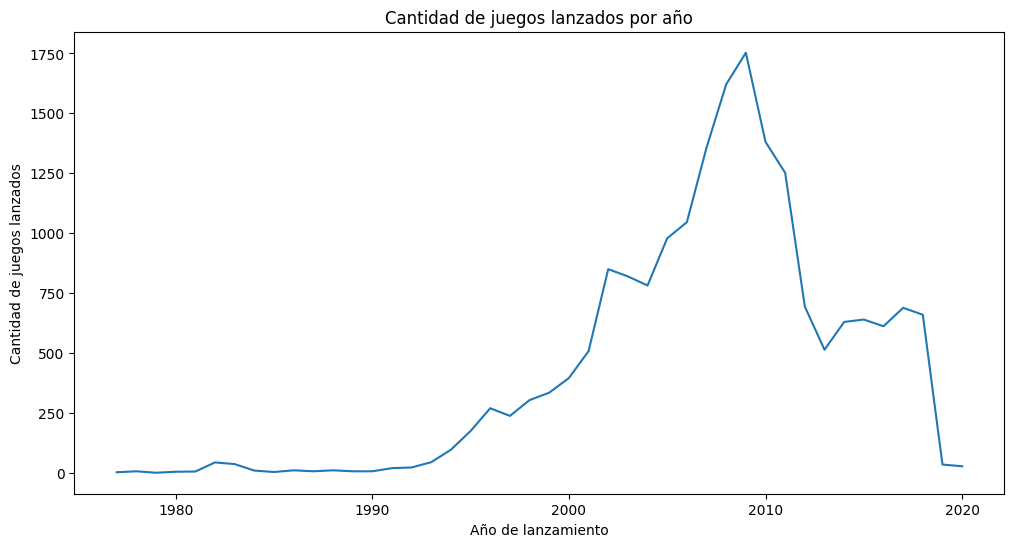

In [ ]:
#Contar la cantidad de juegos lanzados por cada año
games_per_year = dataset.groupby('release_date')['title'].count()

plt.figure(figsize=(12, 6))
sns.lineplot(x=games_per_year.index, y=games_per_year.values)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos lanzados')
plt.title('Cantidad de juegos lanzados por año')
plt.show()


Aquí se puede apreciar como el cambió es abrupto.

In [ ]:
year_counts = dataset['release_date'].value_counts()
year_counts

,count
release_date,
2009,1753
2008,1621
2010,1381
2007,1357
2011,1252
2006,1046
2005,979
2002,850
2003,820


###Acotación del intervalo

In [ ]:
# Drop rows where release_date is 2019 or 2020
dataset = dataset[~dataset['release_date'].isin([2019, 2020])]


In [ ]:
# Drop rows where release_date < 1990
dataset = dataset[dataset['release_date'] >= 1990]


#Exploración de datos
Una vez limpio el dataset, realizaremos una exploración de los datos que continuaremos utilizando.

##Previsualizacion

In [ ]:
dataset.head()

,title,console,genre,publisher,developer,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,20.32,6.37,0.99,9.85,3.12,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,19.39,6.06,0.60,9.71,3.02,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,16.15,8.41,0.47,5.49,1.78,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,15.86,9.06,0.06,5.33,1.42,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,15.09,6.18,0.41,6.05,2.44,2015


In [ ]:
dataset.tail()

,title,console,genre,publisher,developer,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
18917,Teslagrad,WiiU,Platform,Rain Games,Rain Games,0.0,0.0,0.0,0.0,0.0,2014
18918,Open Season,XB,Platform,Ubisoft,Ubisoft Montreal,0.0,0.0,0.0,0.0,0.0,2006
18919,The SpongeBob SquarePants Movie,PC,Platform,THQ,Heavy Iron Studios,0.0,0.0,0.0,0.0,0.0,2004
18920,Santa Claus Saves the Earth,GBA,Platform,Telegames,Ivolgamus UAB,0.0,0.0,0.0,0.0,0.0,2002
18921,Fossil League: Dino Tournament Championship,DS,Role-Playing,D3 Publisher,MTO,0.0,0.0,0.0,0.0,0.0,2007


In [ ]:
dataset.shape

(18698, 11)

El dataset cuenta con 18698 filas y 11 columnas.

A continuación se listan estas columnas y los valores unicos que las variables categóricas pueden tomar. Este paso se omitirá para las columnas publiser y developer ya que los valores únicos de estas son demasiados.

In [ ]:
dataset.columns

Index(['title', 'console', 'genre', 'publisher', 'developer', 'total_sales',
       'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'release_date'],
      dtype='object')

In [ ]:
print("Valores únicos en la columna de genre:")
print(dataset['genre'].unique())

Valores únicos en la columna de genre:
['Action' 'Shooter' 'Action-Adventure' 'Sports' 'Role-Playing'
 'Simulation' 'Racing' 'Music' 'Misc' 'Fighting' 'Platform' 'Adventure'
 'Strategy' 'Puzzle' 'MMO' 'Sandbox' 'Party' 'Education' 'Board Game'
 'Visual Novel']


In [ ]:
print("Valores únicos en la columna de console:")
print(dataset['console'].unique())

Valores únicos en la columna de console:
['PS3' 'PS4' 'PS2' 'X360' 'XOne' 'PC' 'PSP' 'Wii' 'PS' 'DS' 'GBA' 'XB'
 'PSN' 'GEN' 'PSV' 'DC' 'N64' 'NES' 'SAT' 'SNES' 'GBC' 'GC' 'NS' '3DS'
 'GB' 'WiiU' 'WS' 'VC' 'NG' 'WW' '2600' 'SCD' 'PCE' 'XBL' '3DO' 'GG' 'OSX'
 'Mob' 'PCFX']


##Exploración numérica

In [ ]:
#Exploracion numerica
dataset.describe()

,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
count,18698.000000,18698.000000,18698.00000,18698.000000,18698.000000,18698.000000
mean,0.347164,0.174737,0.03521,0.102206,0.034774,2007.843887
std,0.809586,0.421742,0.10568,0.332547,0.115174,5.584618
min,0.000000,0.000000,0.00000,0.000000,0.000000,1990.000000
25%,0.030000,0.000000,0.00000,0.000000,0.000000,2004.000000
50%,0.120000,0.050000,0.00000,0.010000,0.010000,2008.000000
75%,0.340000,0.170000,0.02000,0.070000,0.020000,2011.000000
max,20.320000,9.760000,2.13000,9.850000,3.120000,2018.000000


1. **Total de Ventas (total_sales):**
* La media de ventas totales es de aproximadamente 0.35 millones de unidades.
* La desviación estándar es de 0.81, lo que indica una variabilidad considerable en las ventas.
* El 25% de los juegos venden menos de 0.03 millones de unidades, mientras que el 75% vende menos de 0.34 millones.

2. **Ventas en Norteamérica (na_sales):**

* La media de ventas en Norteamérica es de 0.17 millones de unidades.

* La desviación estándar es de 0.42, mostrando una dispersión significativa.

* El 50% de los juegos venden menos de 0.05 millones de unidades en esta región.

3. **Ventas en Japón (jp_sales):**

* La media de ventas en Japón es de 0.035 millones de unidades.

* La desviación estándar es de 0.106, indicando menor variabilidad comparada con otras regiones.

* El 50% de los juegos no tienen ventas registradas en Japón.

4. **Ventas en Europa (pal_sales):**

* La media de ventas en Europa es de 0.10 millones de unidades.

* La desviación estándar es de 0.33, mostrando una variabilidad moderada.

* El 50% de los juegos venden menos de 0.01 millones de unidades en esta región.

5. **Otras Ventas (other_sales):**

* La media de ventas en otras regiones es de 0.035 millones de unidades.

* La desviación estándar es de 0.115, similar a las ventas en Japón.

* El 50% de los juegos venden menos de 0.01 millones de unidades en estas regiones.

6. **Fecha de Lanzamiento (release_date):**

* Los juegos analizados abarcan desde 1990 hasta 2018.

* La media del año de lanzamiento es 2007.84, con una desviación estándar de 5.58 años.

* El 50% de los juegos fueron lanzados en o antes de 2008.


##Graficos exploratorios

<ipython-input-306-751cf8cdf34a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset['release_date'], palette="Set2")


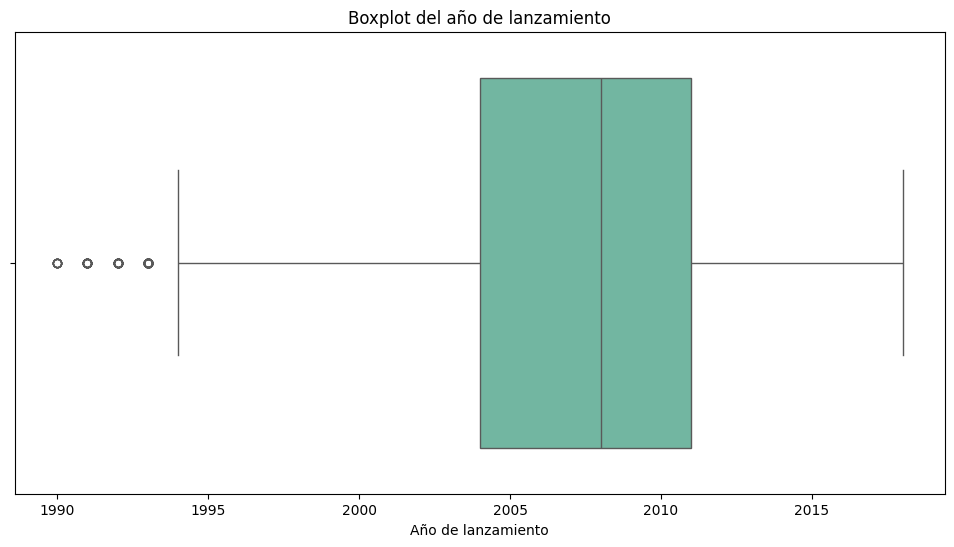

In [ ]:
#Boxplot de los años de lanzamiento
plt.figure(figsize=(12, 6))
sns.boxplot(x=dataset['release_date'], palette="Set2")
plt.xlabel('Año de lanzamiento')
plt.title('Boxplot del año de lanzamiento')
plt.show()


<ipython-input-307-8d8779643096>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset['total_sales'], palette="Set2")


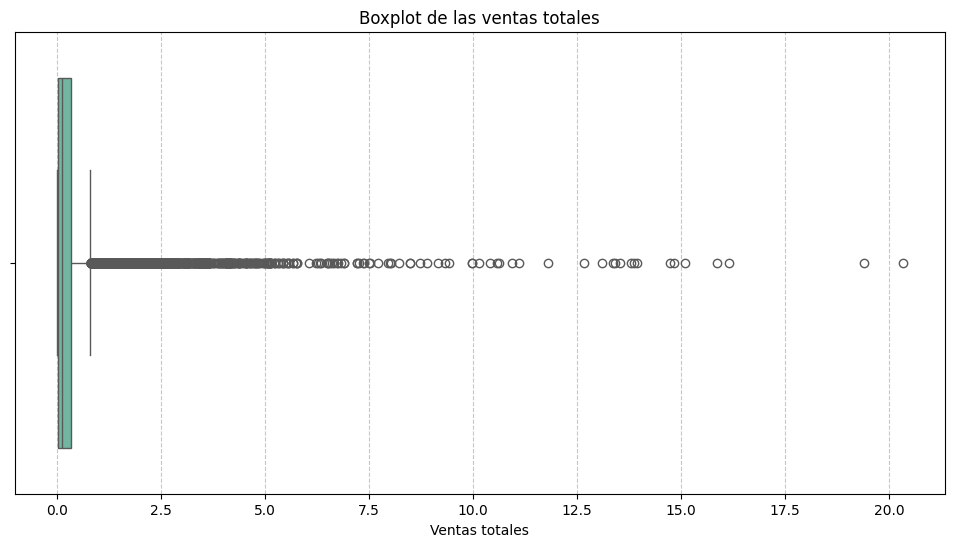

In [ ]:
#Boxplot de ventas totales
plt.figure(figsize=(12, 6))
sns.boxplot(x=dataset['total_sales'], palette="Set2")
plt.xlabel('Ventas totales')
plt.title('Boxplot de las ventas totales')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


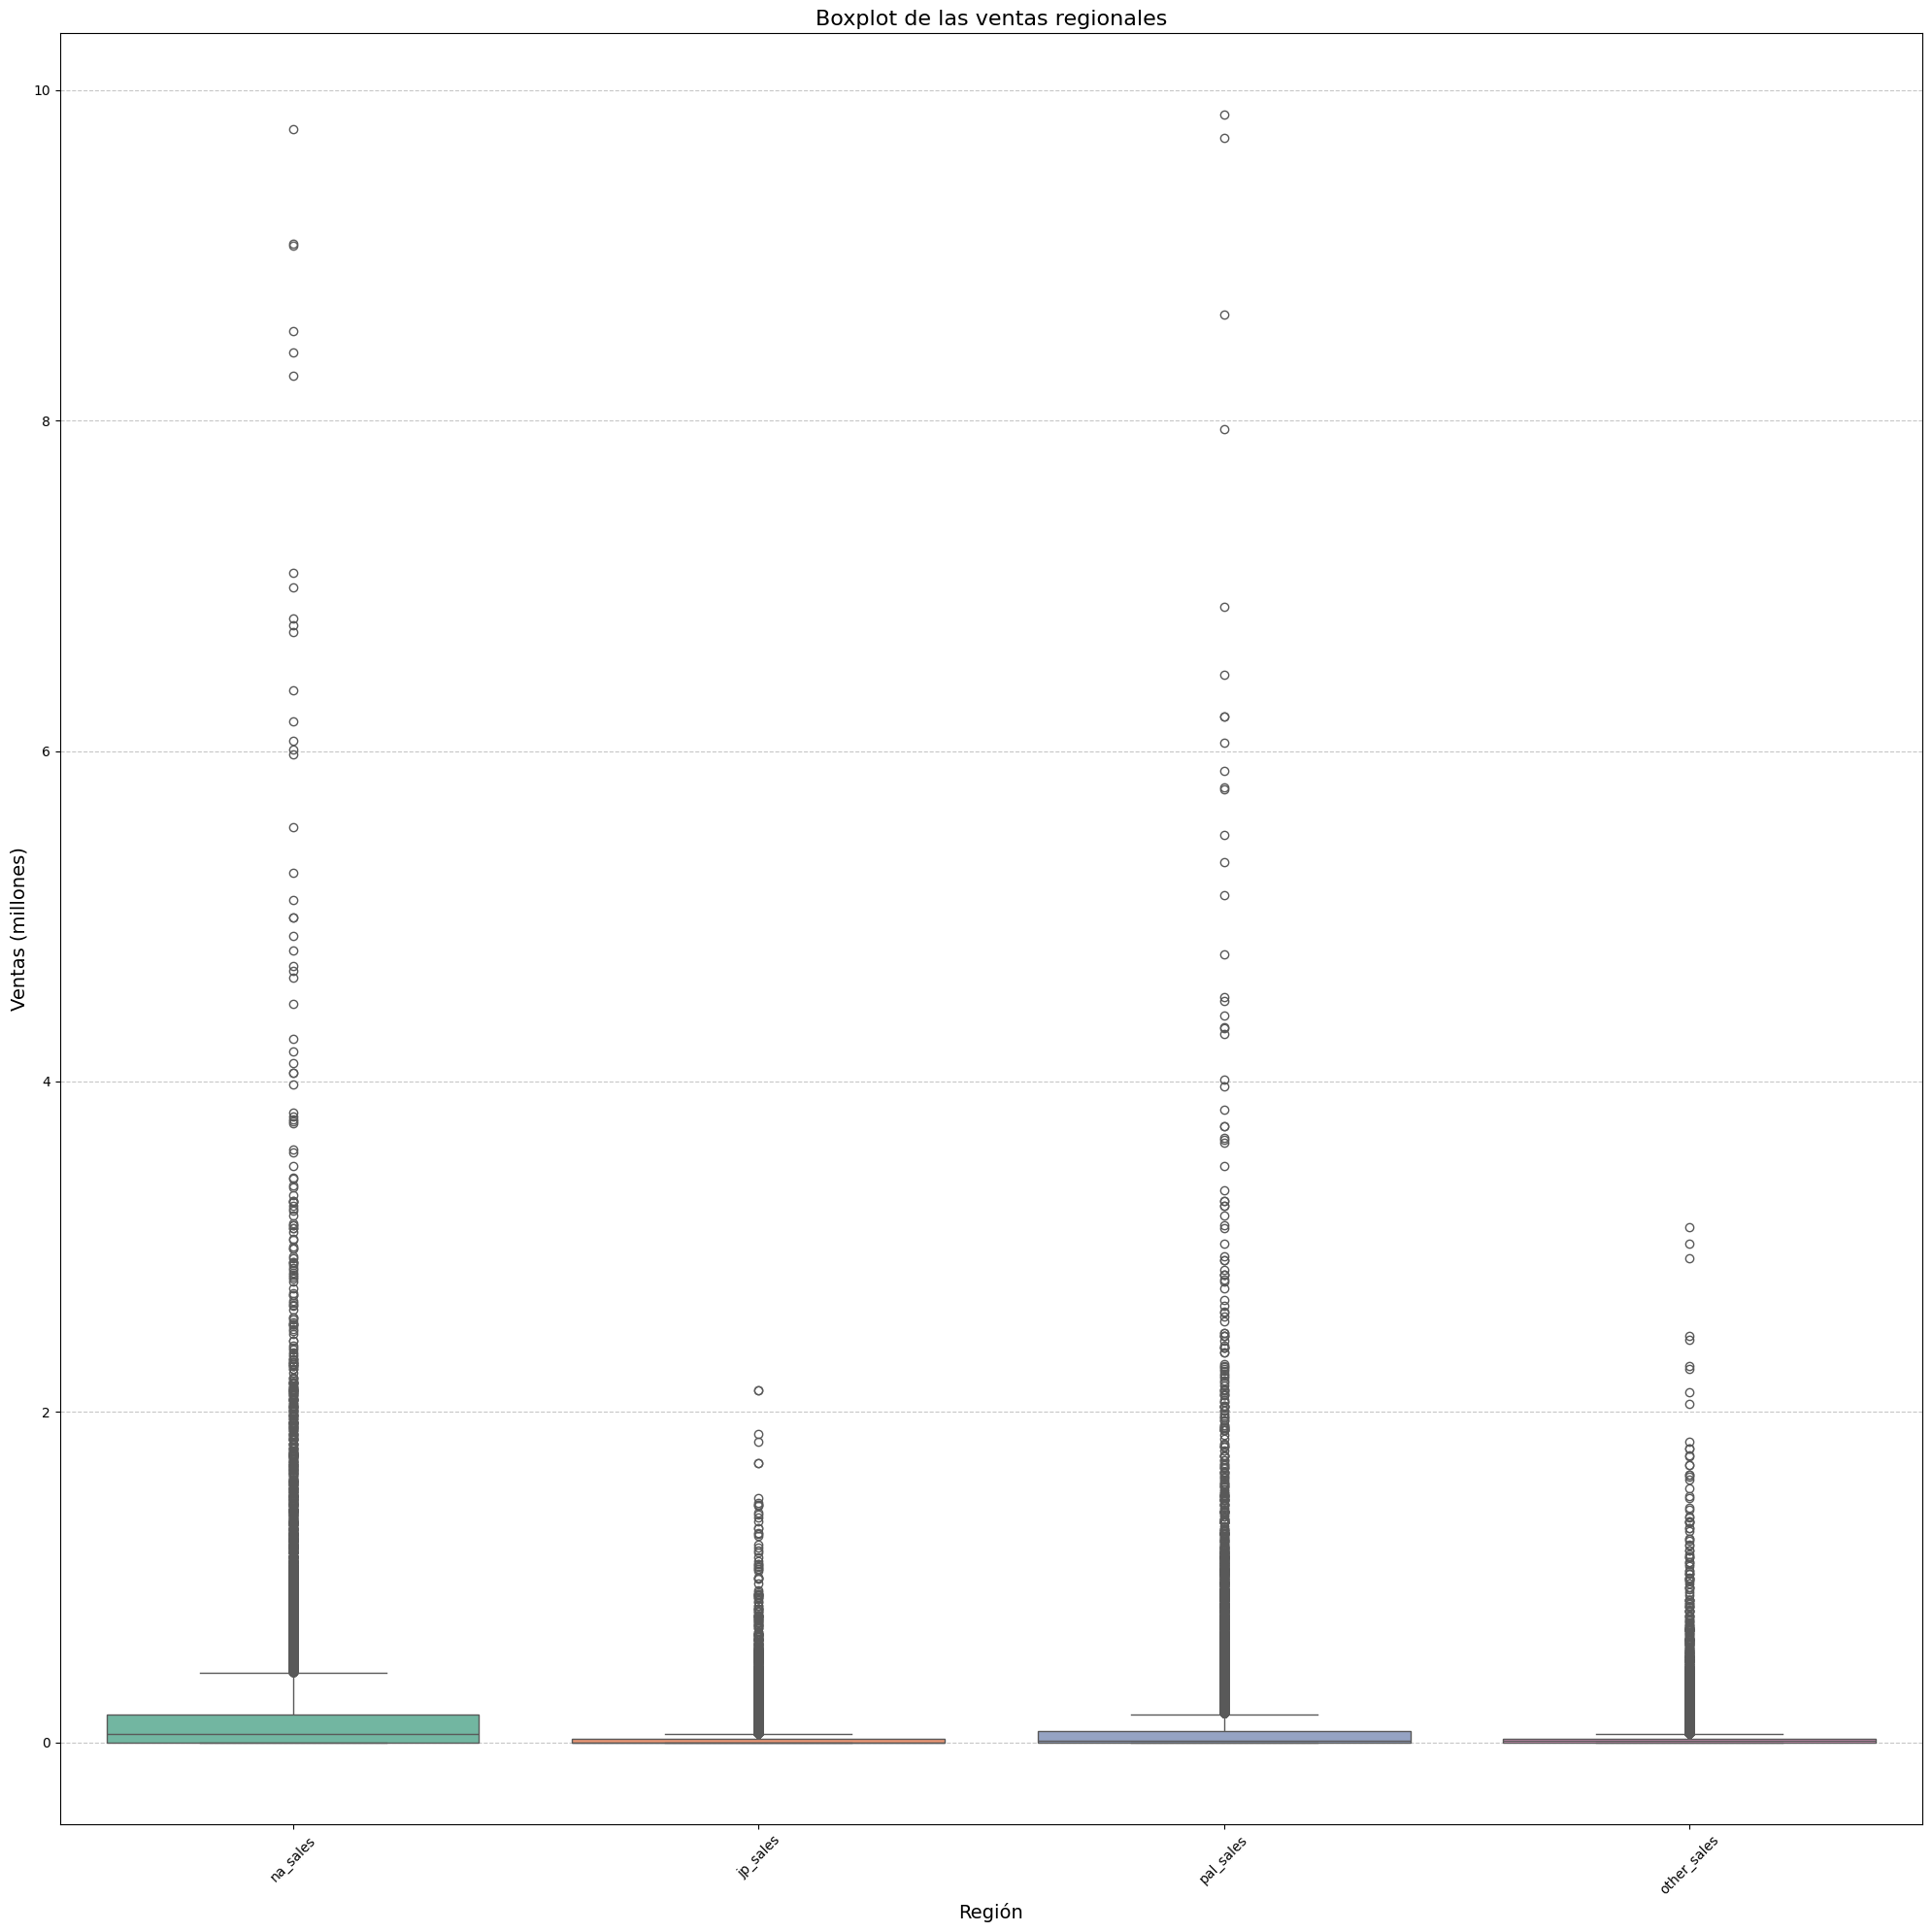

In [ ]:
# Boxplot de ventas por región
plt.figure(figsize=(20, 20))
sns.boxplot(data=dataset[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']], palette="Set2")
plt.xticks(rotation=45)
plt.xlabel('Región', fontsize=14)
plt.ylabel('Ventas (millones)', fontsize=14)
plt.title('Boxplot de las ventas regionales', fontsize=16)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


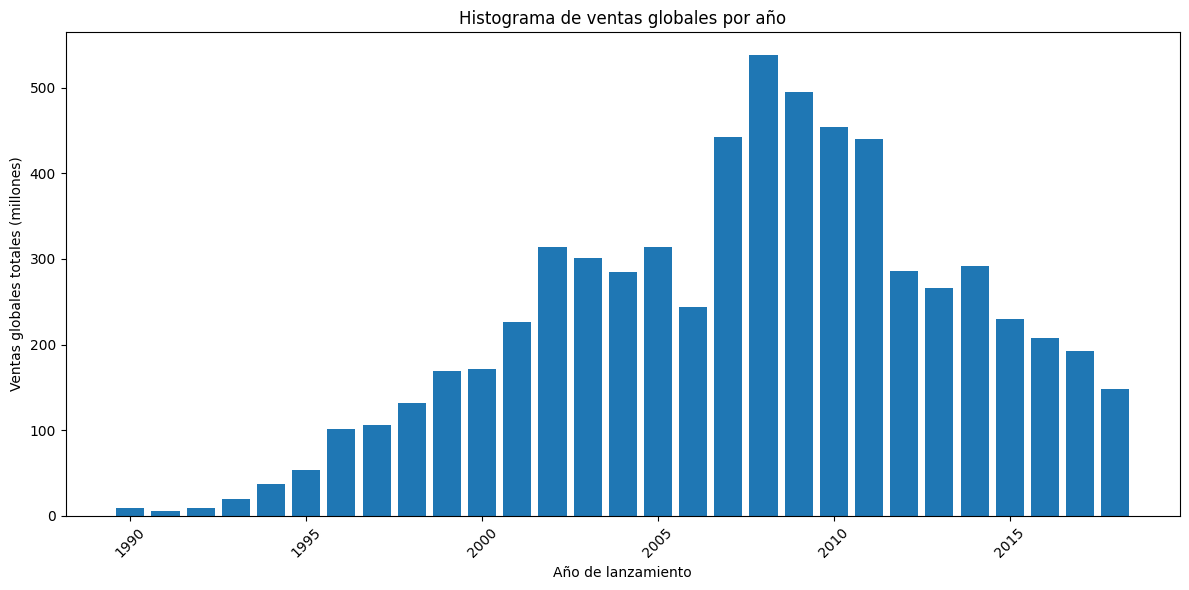

In [ ]:
#Ventas totales por año
sales_by_year = dataset.groupby('release_date')['total_sales'].sum()

plt.figure(figsize=(12, 6))
plt.bar(sales_by_year.index, sales_by_year.values)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales totales (millones)')
plt.title('Histograma de ventas globales por año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


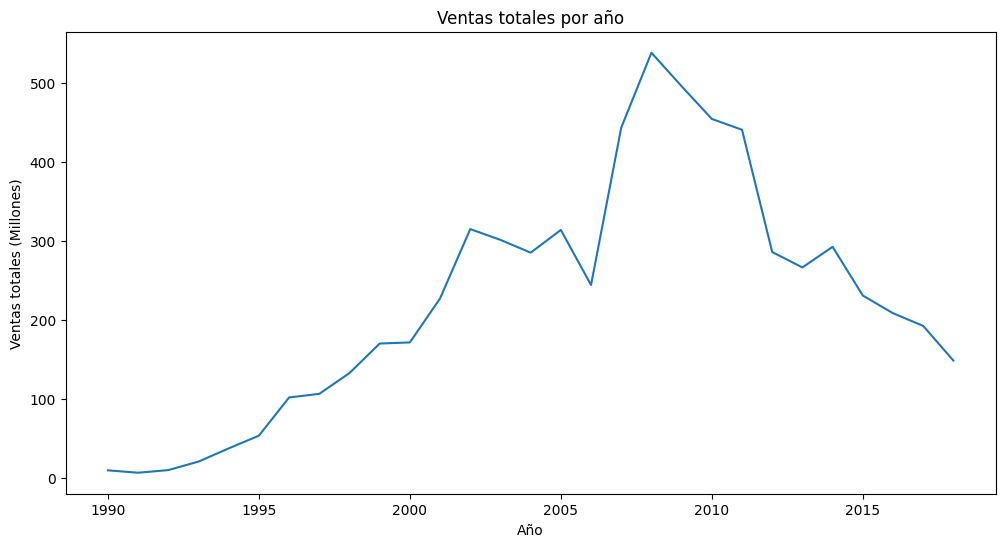

In [ ]:
sales_by_year = dataset.groupby('release_date')['total_sales'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values)
plt.xlabel('Año')
plt.ylabel('Ventas totales (Millones)')
plt.title('Ventas totales por año')
plt.show()

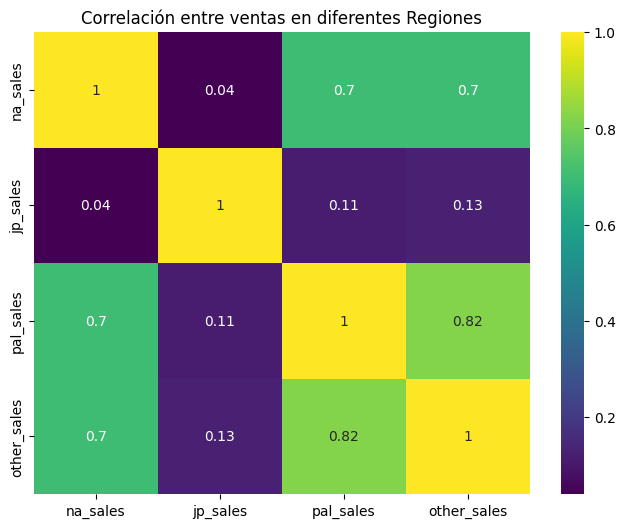

In [ ]:
#Mapas de Calor
correlacion = dataset[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='viridis')
plt.title('Correlación entre ventas en diferentes Regiones')
plt.show()

##Generos más vendidos por region

<ipython-input-312-9fd174a923d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette="viridis")


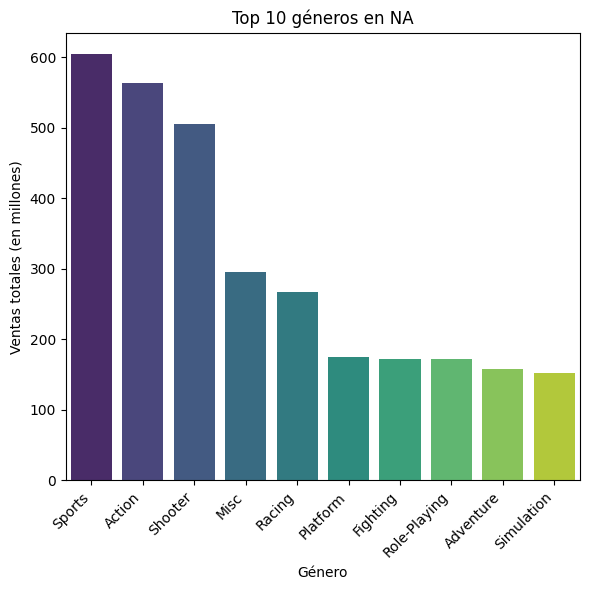

<ipython-input-312-9fd174a923d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette="viridis")


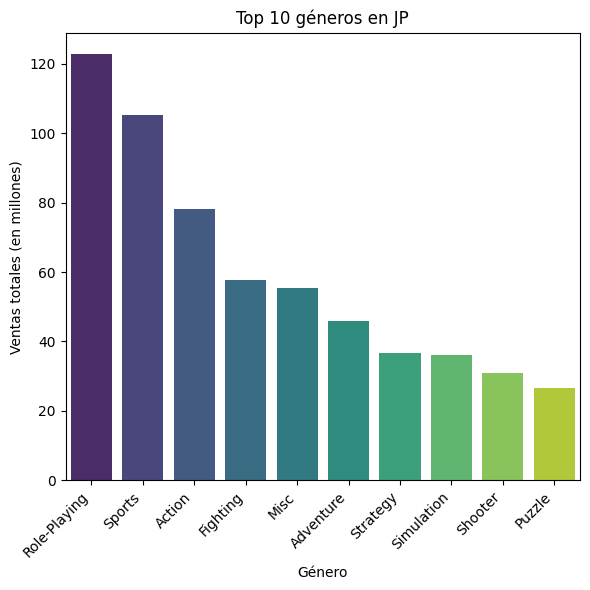

<ipython-input-312-9fd174a923d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette="viridis")


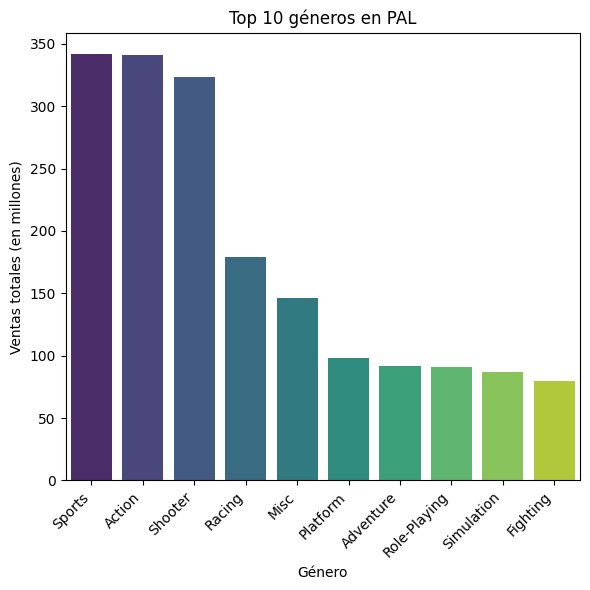

<ipython-input-312-9fd174a923d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette="viridis")


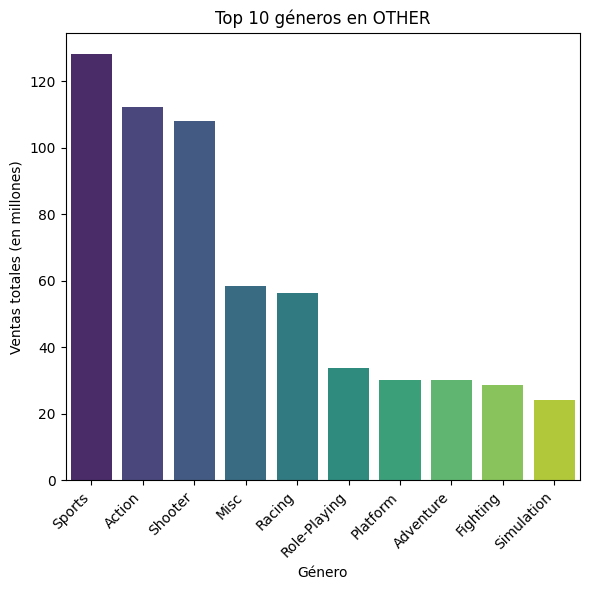

In [ ]:
import matplotlib.pyplot as plt
regions = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']
for region in regions:
    top_10_genres = dataset.groupby('genre')[region].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(6, 6))
    sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette="viridis")
    plt.title(f'Top 10 géneros en {region.replace("_sales", "").upper()}')
    plt.xlabel('Género')
    plt.ylabel('Ventas totales (en millones)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


##Género más vendido globalmente

<ipython-input-313-7bf69e529fef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=global_sales_by_genre.index, y=global_sales_by_genre.values, palette="viridis")


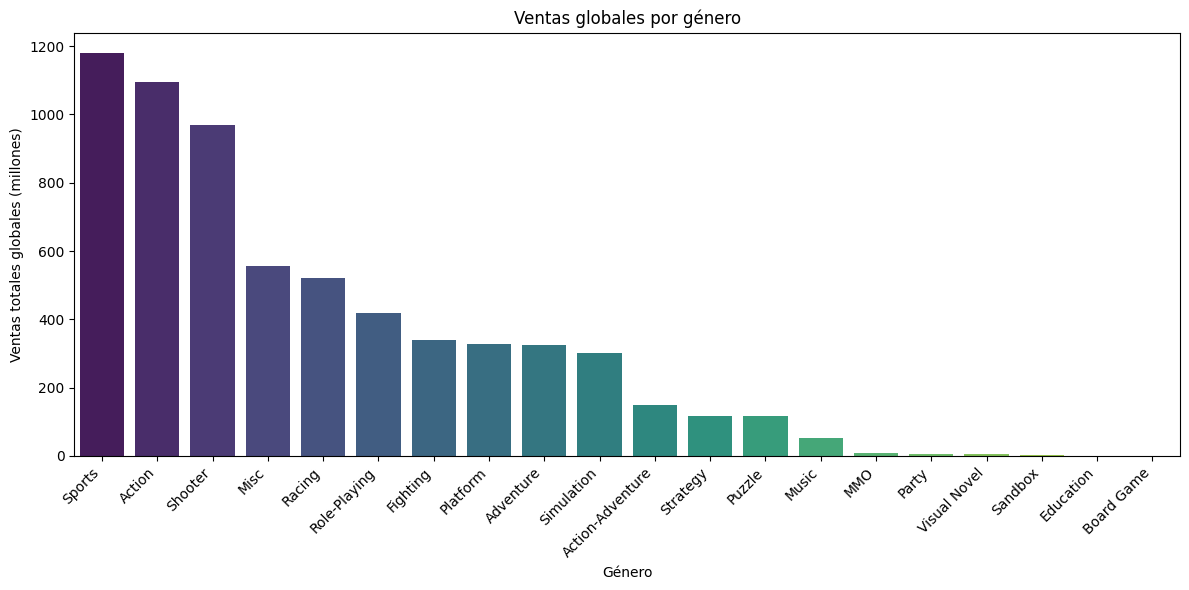

In [ ]:
global_sales_by_genre = dataset.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=global_sales_by_genre.index, y=global_sales_by_genre.values, palette="viridis")
plt.xlabel('Género')
plt.ylabel('Ventas totales globales (millones)')
plt.title('Ventas globales por género')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-314-33786005b9de>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales_global.index, y=platform_sales_global.values, palette="viridis")


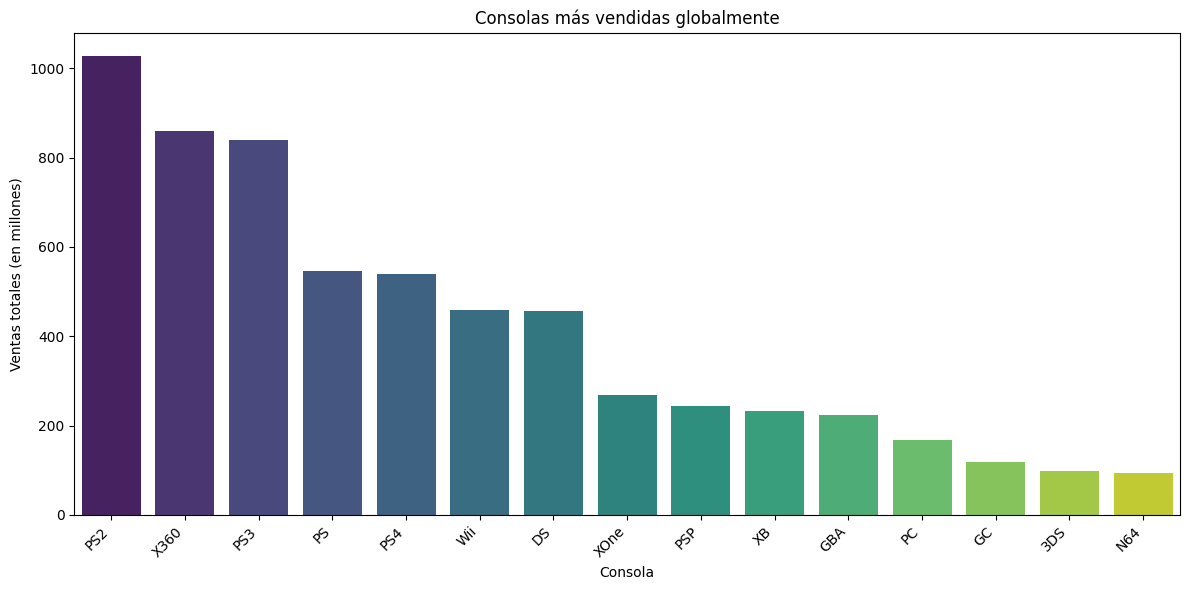

<ipython-input-314-33786005b9de>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales_region.index, y=platform_sales_region.values, palette="viridis")


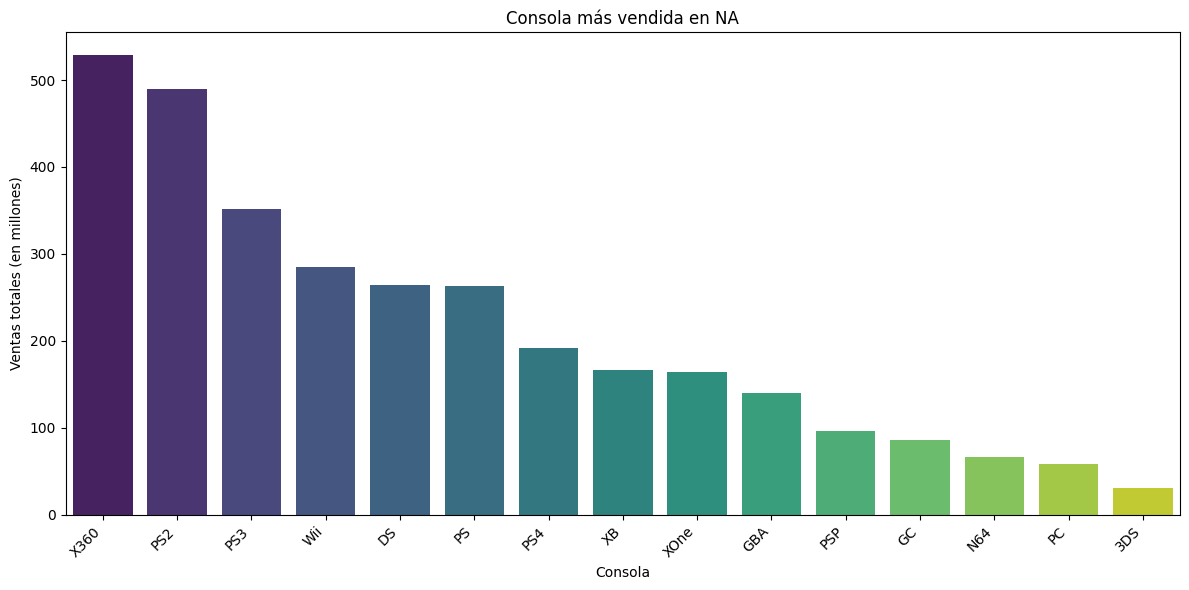

<ipython-input-314-33786005b9de>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales_region.index, y=platform_sales_region.values, palette="viridis")


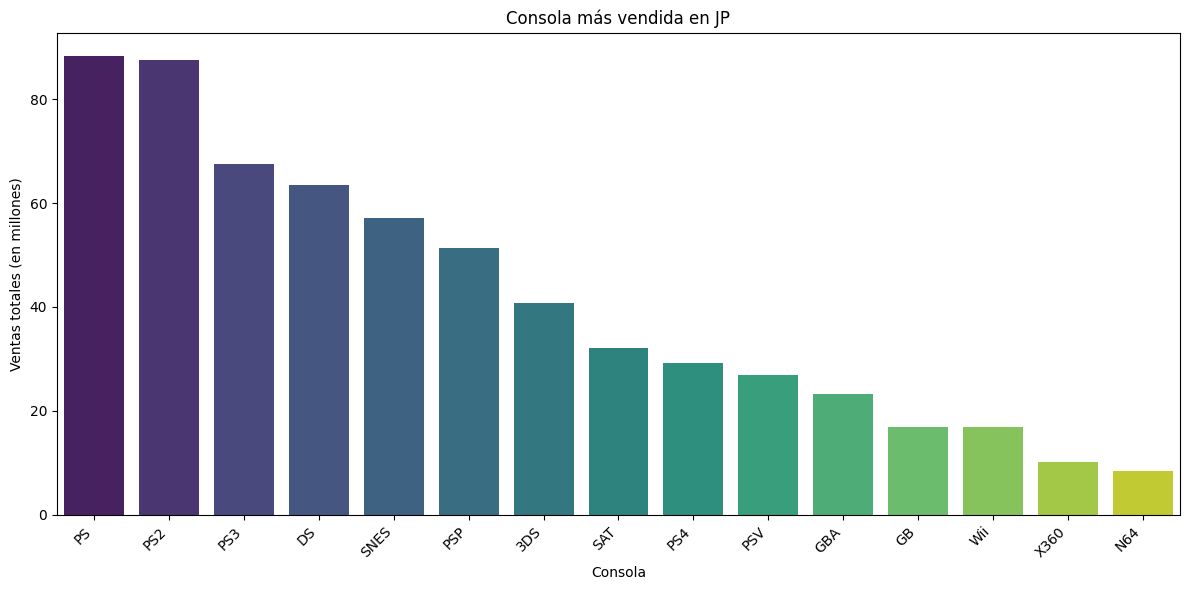

<ipython-input-314-33786005b9de>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales_region.index, y=platform_sales_region.values, palette="viridis")


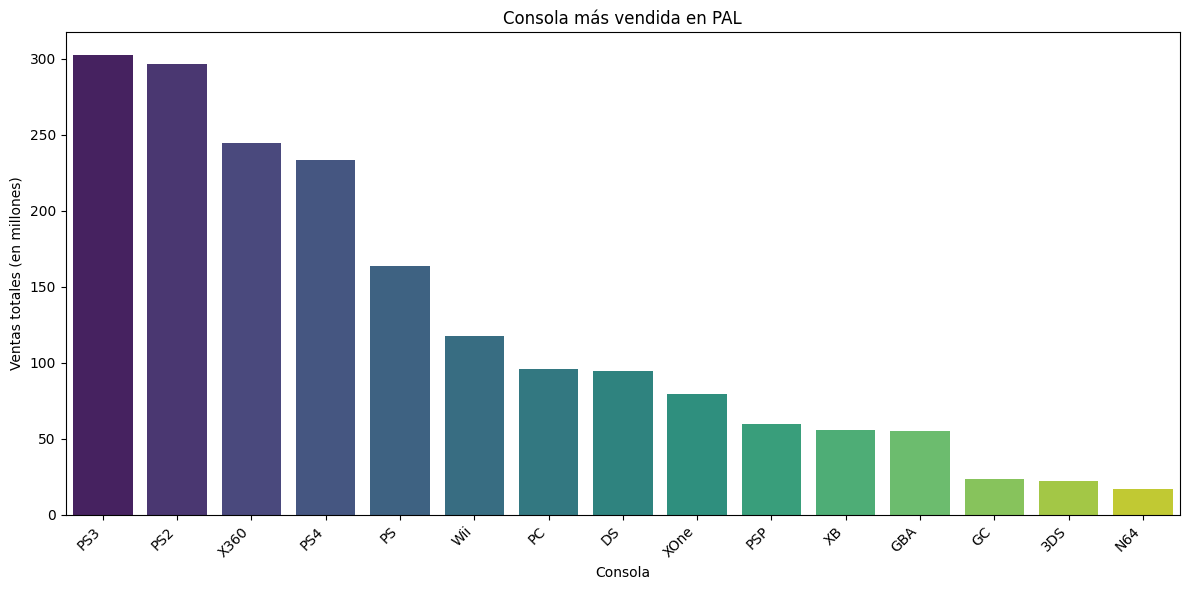

<ipython-input-314-33786005b9de>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales_region.index, y=platform_sales_region.values, palette="viridis")


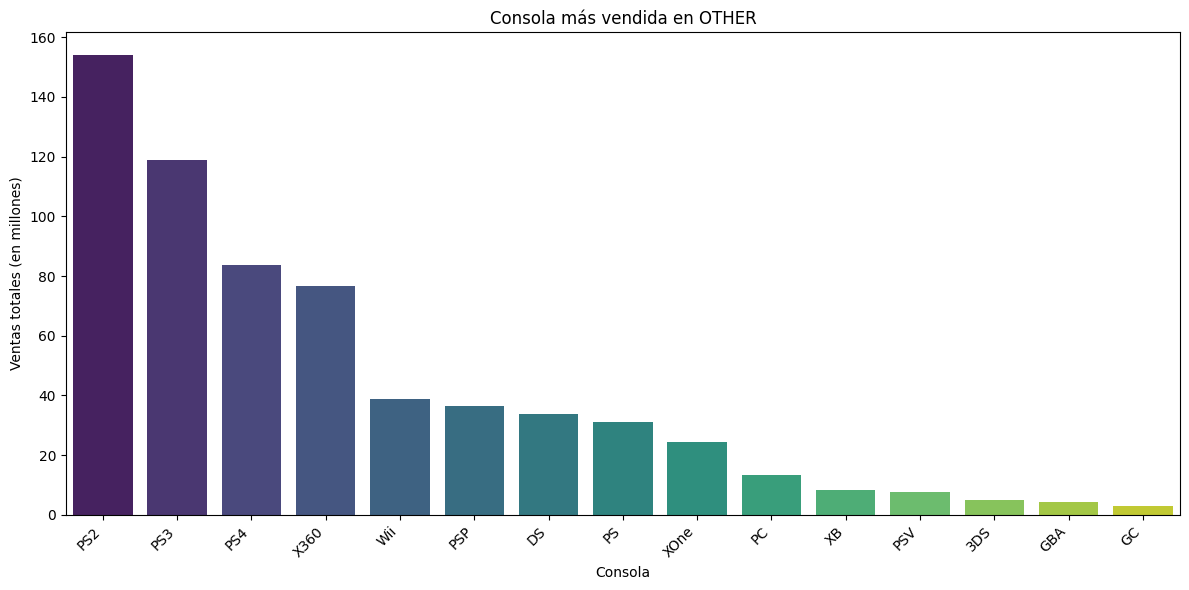

In [ ]:
#Plataforma más vendida globalmente y por regiones
dataset['total_regional_sales'] = dataset['na_sales'] + dataset['jp_sales'] + dataset['pal_sales'] + dataset['other_sales']
platform_sales_global = dataset.groupby('console')['total_regional_sales'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=platform_sales_global.index, y=platform_sales_global.values, palette="viridis")
plt.title('Consolas más vendidas globalmente')
plt.xlabel('Consola')
plt.ylabel('Ventas totales (en millones)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

regions = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales']
for region in regions:
    platform_sales_region = dataset.groupby('console')[region].sum().sort_values(ascending=False).head(15)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=platform_sales_region.index, y=platform_sales_region.values, palette="viridis")
    plt.title(f'Consola más vendida en {region.replace("_sales", "").upper()}')
    plt.xlabel('Consola')
    plt.ylabel('Ventas totales (en millones)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


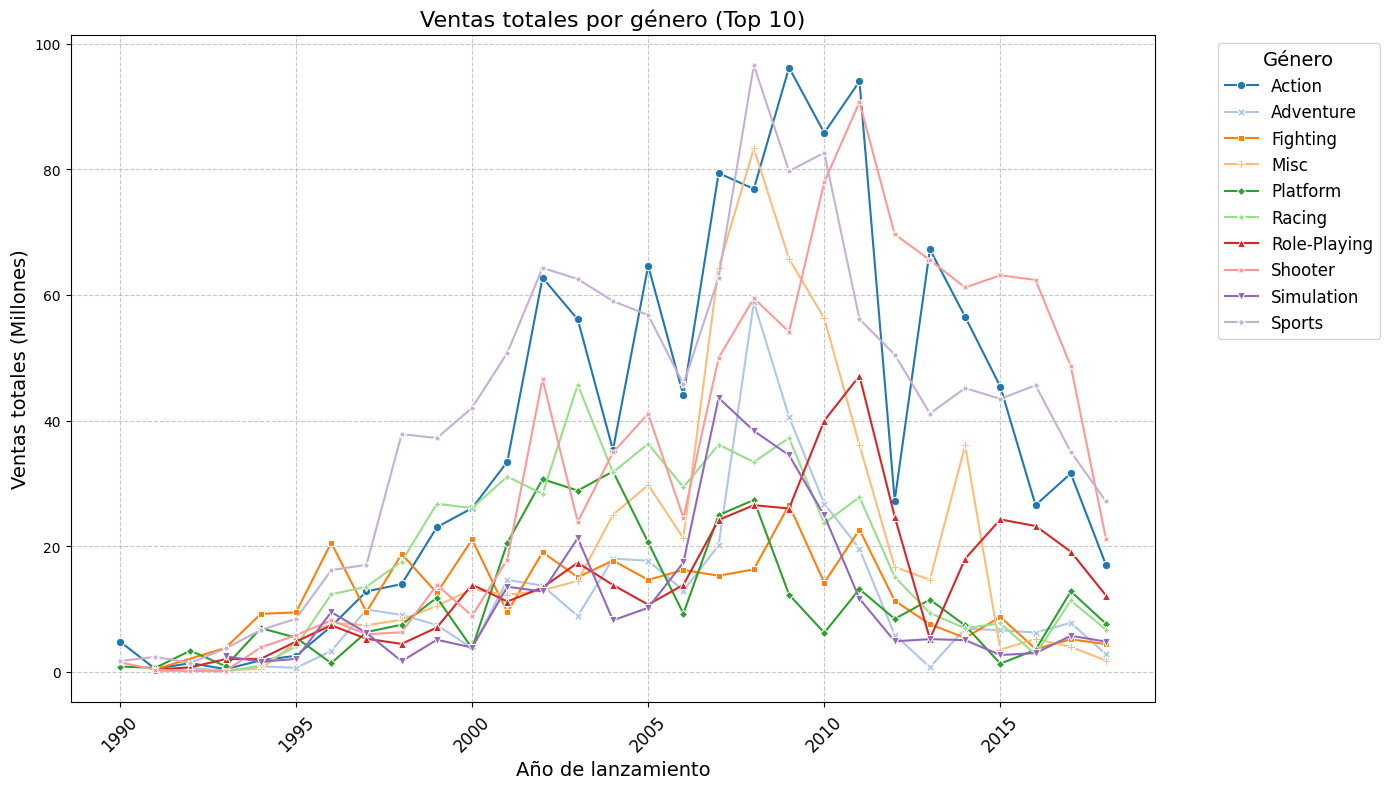

In [ ]:
sales_by_genre_year = dataset.groupby(['genre', 'release_date'])['total_sales'].sum().reset_index()

top_10_genres = dataset['genre'].value_counts().nlargest(10).index

top_genres_sales = sales_by_genre_year[sales_by_genre_year['genre'].isin(top_10_genres)]

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=top_genres_sales,
    x='release_date',
    y='total_sales',
    hue='genre',
    style='genre',
    markers=True,
    dashes=False,
    palette='tab20'
)

plt.xlabel('Año de lanzamiento', fontsize=14)
plt.ylabel('Ventas totales (Millones)', fontsize=14)
plt.title('Ventas totales por género (Top 10)', fontsize=16)

plt.xticks(rotation=45, fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=12,
    title='Género',
    title_fontsize=14
)

plt.tight_layout()

plt.show()

In [ ]:
dicc = {'Action': 1, 'Shooter': 2, 'Action-Adventure': 3, 'Sports': 4, 'Role-Playing': 5,
 'Simulation': 6, 'Racing': 7, 'Music': 8, 'Misc': 9, 'Fighting': 10, 'Platform': 11, 'Adventure': 12,
 'Strategy': 13, 'Puzzle': 14, 'MMO': 15, 'Sandbox': 16, 'Party': 17, 'Education': 18, 'Board Game': 19,
 'Visual Novel': 20}

dicc_2 = {y: x for x, y in dicc.items()}

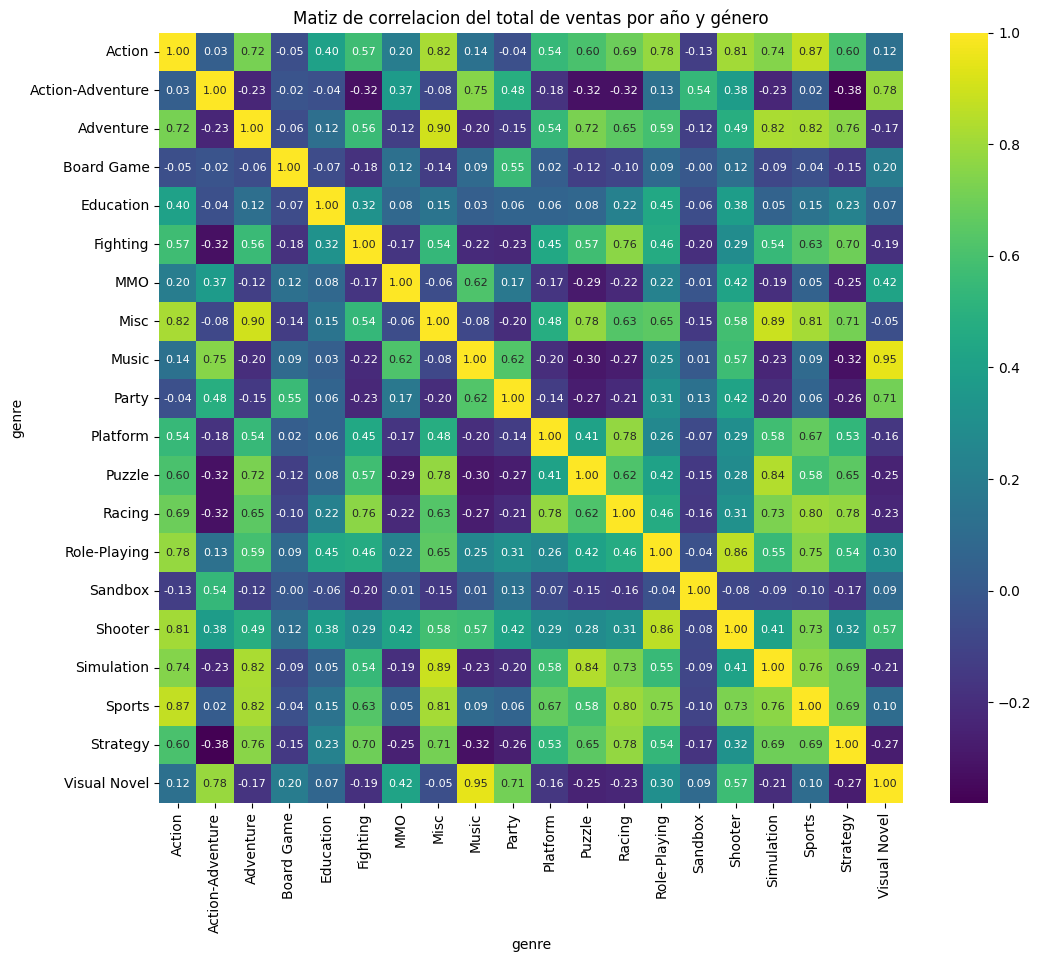

In [ ]:
sales_by_year_genre = df.groupby(['release_date', 'genre'])[sales_columns].sum().reset_index()

sales_by_year_genre['genre'] = sales_by_year_genre['genre'].map(dicc_2)

sales_by_year_genre_pivot = sales_by_year_genre.pivot_table(index='release_date', columns='genre', values='total_sales').fillna(0)

correlation_matrix_by_year = sales_by_year_genre_pivot.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_by_year, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 8})
plt.title('Matiz de correlacion del total de ventas por año y género')
plt.show()

#Conclusiones
Al analizar los gráficos puede notarse que las regiones NA, PAL y OTHER tienden a tener preferencias similares en cuanto al género más elegido. Mientras tanto JP es la región que más diferencias tiene con el resto, siguiendo su propio mercado.

Por ejemplo, podemos ver que el género role-playing suele estar por debajo del top 5 en las otras regiones, mientras que en JP es el género que más ventas generó. Este fenómeno también se puede ver en el género fighting, el cual es más popular en Japón que en el resto del mundo.
También podemos notar que los géneros shooter, sports, action y adventure son consistentemente de los géneros más vendidos en todas las regiones.

Respecto a la popularidad de los géneros, puede notarse que fighting siempre fue considerablemente más bajo que los demás pero aún así se mantuvo bastante estable durante el paso de los años.
Puede verse que role-playing tuvo un auge cera de los 2010 y luego perdió popularidad abruptamente.
El caso más notorio es el de shooter, que siempre creció en popularidad, con pocos declives, y en las últimas instancias logró posicionarse por encima de action y sports, dos de los géneros más populares históricamente.

En cuanto a la cantidad de juegos lanzados, se ve un crecimiento constante desde 1990, con un pico en 2009, siendo el año con más lanzamientos. Luego de ese pico, la cantidad de lanzamientos fueron fluctuando durante los años, pero siempre manteniéndose por encima de los 500 lanzamientos.

En cuanto a las consolas, hay una clara preferencia por la marca de Playstation, siendo esta la que más ventas ha acumulado y liderando con la PS2. En el único caso donde otra consola tuvo más ventas que las consolas de Playstation es en la región NA, donde las ventas de X360 superaron ligeramente las de PS2.

#Modelado
Quiero aplicar un modelo predictivo para predecir las ventas de futuros lanzamientos de videojuegos, en base a su género, para qué consola es lanzado, quién lo edita y quién lo desarrolla.

##Preparación de los datos
Pasar las variables categóricas a números.

In [ ]:
#Hago una copia del dataset original para no perderlo
dataset_modelo = dataset
dataset_modelo.head()


,title,console,genre,publisher,developer,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,total_regional_sales
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,20.32,6.37,0.99,9.85,3.12,2013,20.33
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,19.39,6.06,0.60,9.71,3.02,2014,19.39
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,16.15,8.41,0.47,5.49,1.78,2002,16.15
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,15.86,9.06,0.06,5.33,1.42,2013,15.87
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,15.09,6.18,0.41,6.05,2.44,2015,15.08


Elimino la columna title ya que no es relevante para el aprendizaje.

In [ ]:
dataset_modelo = dataset_modelo.drop(['title'], axis=1)
dataset_modelo.head()


,console,genre,publisher,developer,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,total_regional_sales
0,PS3,Action,Rockstar Games,Rockstar North,20.32,6.37,0.99,9.85,3.12,2013,20.33
1,PS4,Action,Rockstar Games,Rockstar North,19.39,6.06,0.60,9.71,3.02,2014,19.39
2,PS2,Action,Rockstar Games,Rockstar North,16.15,8.41,0.47,5.49,1.78,2002,16.15
3,X360,Action,Rockstar Games,Rockstar North,15.86,9.06,0.06,5.33,1.42,2013,15.87
4,PS4,Shooter,Activision,Treyarch,15.09,6.18,0.41,6.05,2.44,2015,15.08


###Reemplazo de valores
Primero creo un diccionario para reemplazar los valores categóricos por numéricos. Este paso lo hago manualmente en para las columnas genre y console, y mediante una función para las columnas publisher y developer, ya que estas últimas contienen una mayor cantidad de valores únicos.

In [ ]:
cleanup = {"genre": {'Action': 1, 'Shooter': 2, 'Action-Adventure': 3, 'Sports': 4, 'Role-Playing': 5,
 'Simulation': 6, 'Racing': 7, 'Music': 8, 'Misc': 9, 'Fighting': 10, 'Platform': 11, 'Adventure': 12,
 'Strategy': 13, 'Puzzle': 14, 'MMO': 15, 'Sandbox': 16, 'Party': 17, 'Education': 18, 'Board Game': 19,
 'Visual Novel': 20},
           "console": {'PS3': 1, 'PS4': 2, 'PS2': 3, 'X360': 4, 'XOne': 5, 'PC': 6, 'PSP': 7, 'Wii': 8, 'PS': 9, 'DS': 10, 'GBA': 11, 'XB': 12,
 'PSN': 13, 'GEN': 14, 'PSV': 15, 'DC': 16, 'N64': 17, 'NES': 18, 'SAT': 19, 'SNES': 20, 'GBC': 21, 'GC': 22, 'NS': 23, '3DS': 24,
 'GB': 25, 'WiiU': 26, 'WS': 27, 'VC': 28, 'NG': 29, 'WW': 30, '2600': 31, 'SCD': 32, 'PCE': 33, 'XBL': 34, '3DO': 35, 'GG': 36, 'OSX': 37,
 'Mob': 38, 'PCFX': 39}}

In [ ]:
dataset_modelo = dataset_modelo.replace(cleanup)
dataset_modelo.head()

<ipython-input-321-ed132b6c560e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_modelo = dataset_modelo.replace(cleanup)


,console,genre,publisher,developer,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,total_regional_sales
0,1,1,Rockstar Games,Rockstar North,20.32,6.37,0.99,9.85,3.12,2013,20.33
1,2,1,Rockstar Games,Rockstar North,19.39,6.06,0.60,9.71,3.02,2014,19.39
2,3,1,Rockstar Games,Rockstar North,16.15,8.41,0.47,5.49,1.78,2002,16.15
3,4,1,Rockstar Games,Rockstar North,15.86,9.06,0.06,5.33,1.42,2013,15.87
4,2,2,Activision,Treyarch,15.09,6.18,0.41,6.05,2.44,2015,15.08


In [ ]:
#Codifico los datos de publisher y developer.
publisher_encoder = LabelEncoder()
developer_encoder = LabelEncoder()

dataset_modelo['publisher'] = publisher_encoder.fit_transform(dataset_modelo['publisher'])
dataset_modelo['developer'] = developer_encoder.fit_transform(dataset_modelo['developer'])


In [ ]:
dataset_modelo.head()

,console,genre,publisher,developer,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,total_regional_sales
0,1,1,526,2048,20.32,6.37,0.99,9.85,3.12,2013,20.33
1,2,1,526,2048,19.39,6.06,0.60,9.71,3.02,2014,19.39
2,3,1,526,2048,16.15,8.41,0.47,5.49,1.78,2002,16.15
3,4,1,526,2048,15.86,9.06,0.06,5.33,1.42,2013,15.87
4,2,2,29,2526,15.09,6.18,0.41,6.05,2.44,2015,15.08


In [ ]:
#Guardo el dataset modificado para no perderlo
dataset_modelo.to_csv('/content/drive/MyDrive/dataset_modelo.csv', index=False)

##Implementación de los modelos

###Random Forest

In [ ]:
df = dataset_modelo

# Seleccionar características y variable objetivo
X = df[['genre', 'console', 'publisher', 'developer']]
y = df['total_sales']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir y evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Error Cuadrático Medio: {mse}')
print(f'Coeficiente de Determinación (R²): {r2}')
print(f'RMSE: {rmse}')

# Ejemplo de predicción para un nuevo videojuego
nuevo_juego = pd.DataFrame({
    'genre': [1],
    'console': [2],
    'publisher': [3],
    'developer': [4],
})

prediccion = model.predict(nuevo_juego)
print(f'\nPredicción de total_sales de ejemplo: {prediccion[0]}')

Error Cuadrático Medio: 0.4256903189929246
Coeficiente de Determinación (R²): 0.37810963737721737
RMSE: 0.6524494761994407

Predicción de total_sales de ejemplo: 1.058933333333333


###Gradient Boosting

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Error Cuadrático Medio: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# Ejemplo de predicción para un nuevo videojuego
nuevo_juego = pd.DataFrame({
    'genre': [1],
    'console': [2],
    'publisher': [3],
    'developer': [4],
})

prediccion = model.predict(nuevo_juego)
print(f'\nPredicción de total_sales de ejemplo: {prediccion[0]}')

Error Cuadrático Medio: 0.4256903189929246
RMSE: 0.6524494761994407
R²: 0.37810963737721737

Predicción de total_sales de ejemplo: 0.7036164999008179


###Importancia de las variables

    Variable  Importancia
3  developer     0.310785
2  publisher     0.273679
1    console     0.210336
0      genre     0.205200


<ipython-input-327-9519a567b2f8>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=importancias_df, palette='viridis')


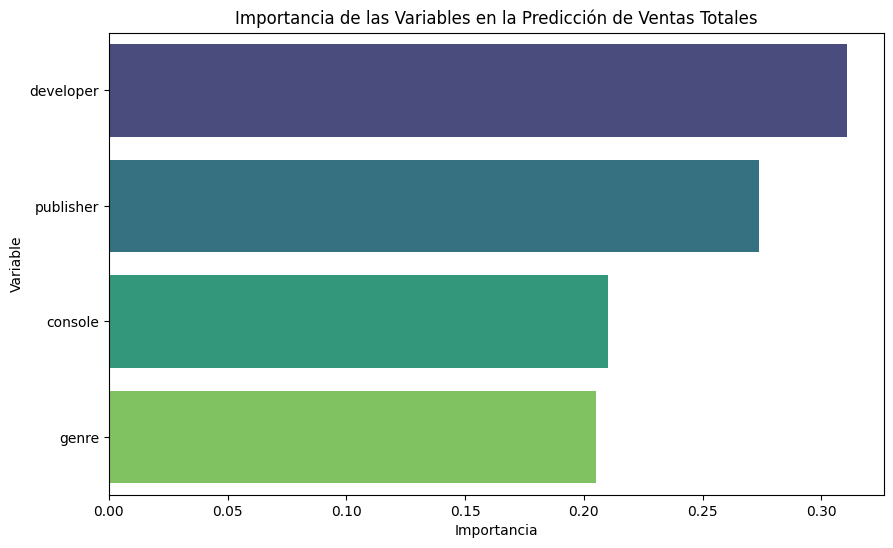

In [ ]:
# Obtener la importancia de las características
importancias = model.feature_importances_

# Crear un DataFrame para visualizar las importancias
importancias_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importancias
})

# Ordenar las variables por importancia
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

# Mostrar la tabla de importancias
print(importancias_df)

# Graficar la importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=importancias_df, palette='viridis')
plt.title('Importancia de las Variables en la Predicción de Ventas Totales')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

###Justificación
Elegí estos dos modelos ya que me parecieron los más adecuados para la consideración de múltiples características que influyen en la variable a predecir.

Los resultados muestran que ambos modelos tuvieron un rendimiento similar, siendo Gradient Boosting ligeramente superior en cuanto a presición, con un R² del 40.3% en comparación con el 37.8 del Random Forest. Además el MSE y el RMSE son ligeramente menores en Gradient Boosting, por lo que sus predicciones son más cercanas a los valores reales.

Con datos más confiables, el modelo podría adaptarse para predecir la cantidad de ventas que tendrá un lanzamiento en regiones en específico.